In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importing the file path that represents the location on the computer where the Instacart Basket Analysis is stored
path = r'C:\Users\rdpor\anaconda3\Scripts\Instacart Basket Analysis'

In [3]:
# importing the merged_df pickle file from 4.9 part 1 this is the one that has the merged version of data 
# from the new customers column that was created in 4.9 part 1
merged_df = pd.read_pickle(r'C:\Users\rdpor\anaconda3\Scripts\Instacart Basket Analysis\02 Data\Prepared Data\merged_df.pkl')


In [4]:
merged_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
merged_df.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_orders,age,number_of_dependants,income
count,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.035613e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07
mean,1.710748e+06,1.029374e+05,1.714192e+01,2.738810e+00,1.342500e+01,1.110416e+01,2.557778e+04,8.351176e+00,5.896888e-01,7.121649e+01,9.922231e+00,1.198114e+01,3.305217e+01,1.198114e+01,1.039794e+01,4.946521e+01,1.501872e+00,9.943525e+04
std,9.872996e+05,5.946649e+04,1.753489e+01,2.090047e+00,4.246351e+00,8.778943e+00,1.409614e+04,7.126688e+00,4.918902e-01,3.820429e+01,6.281190e+00,4.954311e+02,2.515449e+01,8.319087e+01,7.131230e+00,1.848553e+01,1.118871e+00,4.305473e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559450e+05,5.142000e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.391954e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.699800e+04
50%,1.711049e+06,1.026125e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.829438e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661200e+04
75%,2.565510e+06,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.258696e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279080e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [6]:
# finding the minimumn value in the age column
merged_df['age'].min()

18

In [7]:
# finding the maximum value in the age column
merged_df['age'].max()

81

In [8]:
# finding the mean/ average value in the age column
merged_df['age'].mean()

49.465207016591

 5. The marketing and business strategy units at Instacart want 
to create more-relevant marketing strategies for different 
products and are, thus, curious about customer profiling in
their database. Create a profiling variable based on age,
income, certain goods in the “department_id” column, and 
number of dependents. You might also use the 
“orders_day_of_the_week” and “order_hour_of_day” columns
if you can think of a way they would impact customer profiles.
(Hint: As an example, try thinking of what characteristics would
 lead you to the profile “Single adult” or “Young parent.”)

In [9]:
# This code 
# defines the boundaries that will be used
# to group or categorize individuals based on 
# their ages. The numbers represent the lower
# limits for each age group. For instance,
# individuals whose ages fall within the range 
# of 18 to 36 will be in one group, 
# those between 36 and 56 will be in another group,
# and those between 56 and 82 will be in the third group.

age_bins = [18, 36, 56,82] # Bins: 18-35, 36-55, 56-81


In [11]:
# In simpler terms, the age_labels list assigns descriptive labels to different age groups. In this specific case:

# 'Young Adults' refers to the age group of individuals between 18 and 36.
# 'Middle age Adults' refers to the age group of individuals between 36 and 56.
# 'Senior Adults' refers to the age group of individuals between 56 and 82.
# These labels help provide clear and easy-to-understand descriptions for
# the different age groups that have been defined using the age_bins. When 
# the ages are categorized into these groups, the corresponding labels can
# be assigned to make the data more understandable and user-friendly.



age_labels = ['Young Adults', 'Middle age Adults', 'Senior Adults']



In [12]:
# Answer to # 5. 

# This is creating a new column,
# 'age_group', in the DataFrame 'merged_df'. It categorizes the
# ages of individuals into different groups or bins based on
# predefined intervals and assigns corresponding labels to 
# these groups. This can help in analyzing and understanding
# data based on different age ranges or groups.

merged_df['age_group'] = pd.cut(merged_df['age'], bins=age_bins, labels=age_labels, right=False)

In [13]:
#checking the value counts for 'age_group'

merged_df['age_group'].value_counts(dropna=False)

Senior Adults        13104038
Middle age Adults    10175428
Young Adults          9154746
Name: age_group, dtype: int64

In [14]:
merged_df['income'].describe()

count    3.243421e+07
mean     9.943525e+04
std      4.305473e+04
min      2.590300e+04
25%      6.699800e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

In [15]:
# This is creating more BINS 
# In simpler terms, the income_bins list defines 
# the boundaries that will be used to group or 
# categorize individuals based on their income levels.
# The numbers represent the lower limits for each income group. 
# For example, individuals with incomes within the range of
# $25,903 to $67,066 will be in one group, those between 
# $67,066 and $127,934 will be in another group, and those
# between $127,934 and $593,901 will be in the third group.

income_bins = [25903, 67066, 127934, 593901] 



In [16]:
# creating more BINS
# These labels help provide clear and easy-to-understand
# descriptions for the different income groups that have 
# been defined using the income_bins. When the income levels
# are categorized into these groups, the corresponding labels
# can be assigned to make the data more understandable and user-friendly.

income_labels = ['Low Income', 'Middle Income', 'High Income']

In [17]:
# This line of code is creating a new column,
# 'income_group', in the DataFrame 'merged_df'. It categorizes
# individuals based on their income levels into different income
# groups, as defined by the income_bins and income_labels. 
# This can help in analyzing and understanding data based
# on different income ranges or groups.

merged_df['income_group'] = pd.cut(merged_df['income'], bins=income_bins, labels=income_labels, right=False)

In [18]:
merged_df['income_group'].value_counts(dropna=False)

Middle Income    16206409
Low Income        8125783
High Income       8101380
NaN                   640
Name: income_group, dtype: int64

In [19]:
merged_df['department_id'].describe()

count    3.243421e+07
mean     9.922231e+00
std      6.281190e+00
min      1.000000e+00
25%      4.000000e+00
50%      9.000000e+00
75%      1.600000e+01
max      2.100000e+01
Name: department_id, dtype: float64

In [21]:
merged_df['gender'].value_counts(dropna=False)

Male      16329623
Female    16104589
Name: gender, dtype: int64

In [22]:
# In simple terms, this line of code is creating a new DataFrame,
# 'income_age', which shows the number of individuals falling into
# different combinations of income and age groups. It counts how
# many individuals belong to each combination of income group and 
# age group, helping to understand the distribution of individuals
# across different income and age categories. This can be useful
# for analyzing relationships between income levels and age groups
# within the dataset.

income_age = pd.crosstab(merged_df['income_group'], merged_df['age_group'], dropna = False)

In [23]:
income_age

age_group,Young Adults,Middle age Adults,Senior Adults
income_group,,,
Low Income,4225332,2193243,1707208
Middle Income,4826266,5013744,6366399
High Income,103148,2968441,5029791


In [24]:
#  this line of code is creating
# a new column, 'dependent_status', in the DataFrame
# 'merged_df'. It examines the values in the 'number_of_dependants'
# column and assigns a corresponding label to each row in the
# 'dependent_status' column based on whether the individual has
# no dependents or one or more dependents. This can help in 
# understanding the dependent status of individuals in the dataset.


merged_df['dependent_status'] = merged_df['number_of_dependants'].apply(lambda x: 'No Dependents' if x == 0 else 'One or More Dependents')

In [25]:
# In simpler terms, this line of code is updating 
# the 'customer_profile' column in the DataFrame 
# 'merged_df'. It checks whether the 'age_group' is
# 'Young Adults' and the 'number_of_dependants' is
# 0 for each row. If these conditions are met, it
# assigns the value "Single Adult" to the 'customer_profile' 
# column. This helps in categorizing and understanding different 
# customer profiles based on age and dependency status.

merged_df.loc[(merged_df['age_group'] == 'Young Adults') & (merged_df['number_of_dependants'] == 0), 'customer_profile'] = "Single Adult"

In [26]:
# this line of code is updating
# the 'customer_profile' column in the DataFrame 
# 'merged_df'. It checks whether the 'age_group' 
# is 'Senior Adults' and the 'income_group' is either
# 'Middle Income' or 'High Income' for each row. 
# If these conditions are met, it assigns the value
# "Senior Shopper" to the 'customer_profile' column.
# This helps in categorizing and understanding different
# customer profiles based on age and income levels.


merged_df.loc[(merged_df['age_group'] == 'Senior Adults') & (merged_df['income_group'].isin(['Middle Income', 'High Income'])), 'customer_profile'] = "Senior Shopper"

In [27]:
# this line of code is counting
# the occurrences of each unique value in the 
# 'customer_profile' column of the DataFrame 'merged_df'.
# It will create a new table, 'profile_counts',
# showing how many customers fall into each category or profile.
# This information helps in understanding the distribution of
# different customer profiles within the dataset, which can be
# useful for making business decisions and analyzing customer behavior.

profile_counts = merged_df['customer_profile'].value_counts() 

6. Create an appropriate visualization to show the distribution of profiles.

7.  Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

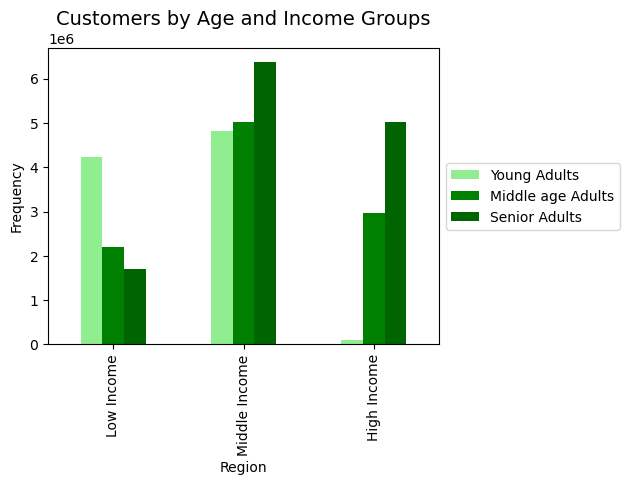

In [28]:
income_age.plot.bar(color=['lightgreen','green','darkgreen',])
plt.xlabel("Region", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Customers by Age and Income Groups", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [29]:
# This code is taking the plt.savefig()
# function and is used to save the plotted figure as
# an image file. Make sure you have the necessary
# permissions to save the file in the specified directory. 
# This will save the figure as 'customer_profile.png'
# in the specified visualization directory.


plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile.png'))

<Figure size 640x480 with 0 Axes>

8.  Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

Text(0.5, 0, '# of Orders')

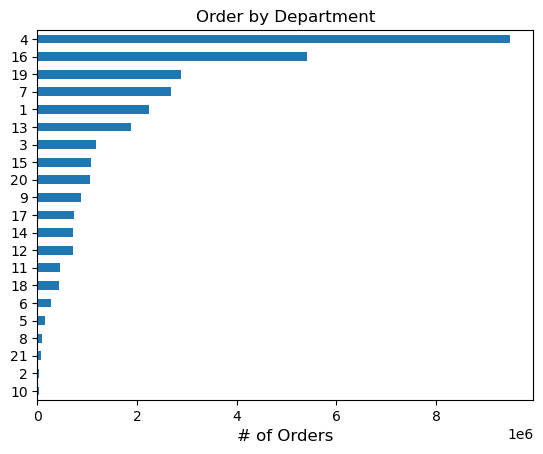

In [30]:
# Overall, this code snippet is creating a horizontal bar plot to visualize
# the number of orders in each department. The departments are sorted based 
# on the number of orders, and the plot provides a visual representation of 
# the order distribution across different departments.
# ***Note: department_id is not showing up on the Y axis

bar_dept = merged_df['department_id'].value_counts().sort_values(ascending=True)
bar_dept.plot.barh (title = 'Order by Department')
plt.xlabel("# of Orders", fontsize=12)  

In [31]:
#  this line of code saves the current
# figure that has been created using matplotlib as an image file.
# It uses the specified directory path and file name to determine
# where the image file will be saved. This is useful for preserving
# data visualizations for later use or for sharing with others.

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile.png'))

<Figure size 640x480 with 0 Axes>

In [32]:
# this code snippet is performing a grouped aggregation
# on the DataFrame 'merged_df' based on the 'income_group' and
# 'department_id' columns. It then counts the occurrences of 
# each unique combination of 'income_group' and 'department_id',
# and the resulting data is organized and reshaped to provide a 
# clearer view of the relationship between income groups, 
# department IDs, and the number of orders.

income_dept = merged_df.groupby(['income_group', 'department_id'])['order_id'].count().unstack()

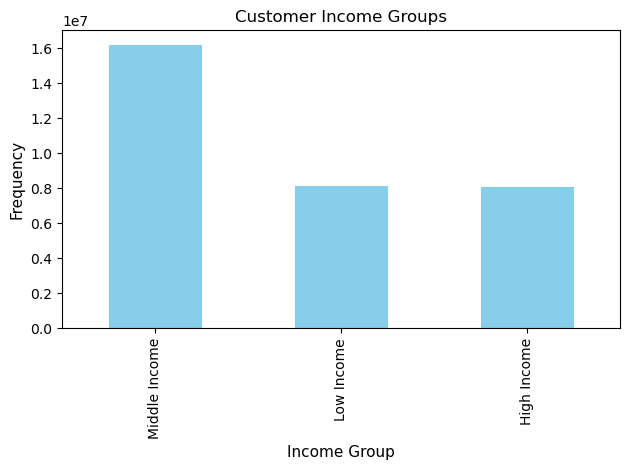

In [33]:
# this code snippet is creating 
# a bar plot to visualize the distribution of customers
# across different income groups. It provides a clear 
# representation of the frequency of each income group within
# the dataset, helping to understand the customer demographic 
# based on their income levels.


bar_income_groups = merged_df['income_group'].value_counts().plot.bar(color=['skyblue'])
plt.title("Customer Income Groups",fontsize=12)
plt.xlabel("Income Group", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.tight_layout()

Text(0, 0.5, 'Number of Customers')

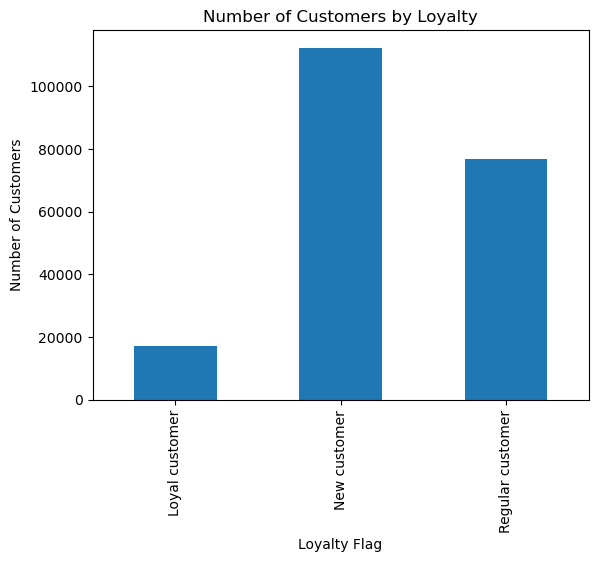

In [34]:
# This code is creating 
# a bar plot to visualize the count of customers for 
# each loyalty flag. It helps in understanding the 
# distribution of customers based on their loyalty status,
# providing insights into customer retention and engagement
# with the business.

loyalty_customers = merged_df.groupby('loyalty_flag')['user_id'].nunique()
bar_loyalty_customers = loyalty_customers.plot.bar(title = "Number of Customers by Loyalty")
plt.xlabel("Loyalty Flag")
plt.ylabel("Number of Customers")

In [35]:
# In simpler terms, this line of code saves the bar plot generated
# as an image file named 'customer_loyalty.png' in the specified path
# '04 Analysis/Visualizations'. This allows you to retain the visualization 
# as a file that can be easily shared, viewed, or included in reports
# or presentations outside of the Jupyter Notebook environment.

bar_loyalty_customers.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_loyalty.png'))

go double check whats below this might need to delete see if it's necessary for part 3 or not. this stuff below is from part 3 

In [36]:
#7 is below this the aggregate.  Should I move it?

In [37]:
# Also note, this code is creating a new dataframe called "aggregate_age_group"
# this line of code groups 
# the data in the DataFrame 'merged_df' by age
# and then performs several aggregate functions
# on the 'order_number' and 'prices' columns for
# each age group. This provides insights into the 
# average, minimum, and maximum values for both the
# number of orders and the prices associated with
# each age group.

aggregate_age_group = merged_df.groupby('age').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [38]:
# this line of code calculates
# and displays descriptive statistics for the data
# in the DataFrame 'aggregate_age_group'. The
# descriptive statistics summarize the distribution
# of data within each age group, providing insights 
# into the central tendency (mean), variability 
# (standard deviation), and the spread of data points
# (minimum and maximum values) for both the 'order_number' and 'prices' columns.


aggregate_age_group.describe()

order_number                 prices                    
              mean   min   max       mean   min           max
count    64.000000  64.0  64.0  64.000000  64.0     64.000000
mean     17.137034   1.0  99.0  11.976667   1.0  97339.656250
std       0.419619   0.0   0.0   1.789275   0.0  14923.649398
min      16.253176   1.0  99.0   9.152452   1.0  14900.000000
25%      16.898094   1.0  99.0  10.753903   1.0  99999.000000
50%      17.093414   1.0  99.0  11.718393   1.0  99999.000000
75%      17.385621   1.0  99.0  12.782876   1.0  99999.000000
max      18.120131   1.0  99.0  18.138012   1.0  99999.000000